### Drug Discovery Project

 ##### Goal: To develop a machine learning-driven computational workflow that identifies and prioritizes novel candidate compounds targeting the HER2 receptor by predicting their binding affinity, activity, or drug-likeness. This workflow will integrate molecular representations, data-driven predictive models, and virtual screening techniques to accelerate discovery and reduce reliance on traditional experimental screening.

### Part 1 - Data Collection



In [164]:
from numpy.distutils.mingw32ccompiler import manifest_name
from scipy.stats import mannwhitneyu
!pip install chembl_webresource_client

Error processing line 1 of /Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 186, in addpackage
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [165]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [166]:
# Searching the target HER2 (human epidermal growth factor receptor 2) in the ChEMBL database
target = new_client.target
her2 = target.search('HER2')
df = pd.DataFrame.from_dict(her2)
df


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,FASN/HER2,17.0,False,CHEMBL4106134,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
1,[],Homo sapiens,Receptor tyrosine-protein kinase erbB-2,15.0,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,von Hippel-Lindau disease tumor suppressor/Rec...,13.0,False,CHEMBL5465227,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,12.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,12.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
5,[],Homo sapiens,Epidermal growth factor receptor,9.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


In [167]:
#Extracting single protein: CHEMBL2111431 ID
HER2 = df.loc[3, 'target_chembl_id']
HER2

'CHEMBL2111431'

In [168]:
# Filtering DC50 for drug potency
act = new_client.activity
result = act.filter(target_chembl_id=HER2).filter(standard_type = 'IC50')

df_1 = pd.DataFrame.from_dict(result)
df_1

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,210452,[],CHEMBL702407,In vitro efficacy (average) against HN5 (EGFR)...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.54
1,None,None,224588,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,62.32
2,None,None,224592,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.84
3,None,None,225816,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,1.79
4,None,None,228495,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,"{'action_type': 'INHIBITOR', 'description': 'N...",None,26330086,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5719588,Inhibition of ERB2/EGFR in human U-266 cells a...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,nM,UO_0000065,None,10000.0
135,"{'action_type': 'INHIBITOR', 'description': 'N...",None,26330087,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5719588,Inhibition of ERB2/EGFR in human U-266 cells a...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,nM,UO_0000065,None,5129.6
136,"{'action_type': 'INHIBITOR', 'description': 'N...",None,26330088,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5719588,Inhibition of ERB2/EGFR in human U-266 cells a...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,nM,UO_0000065,None,364.1
137,"{'action_type': 'INHIBITOR', 'description': 'N...",None,26330094,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5719593,Inhibition of EGFR/ERB2 in human U-266 cells a...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,nM,UO_0000065,None,10000.0


In [169]:
# Making a new df with necessary columns
df_2 = df_1[['molecule_chembl_id', 'standard_type', 'canonical_smiles', 'standard_units', 'standard_value', 'type',  'target_organism']]
df_2

,molecule_chembl_id,standard_type,canonical_smiles,standard_units,standard_value,type,target_organism
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,nM,540.0,IC50,Homo sapiens
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,nM,62320.0,IC50,Homo sapiens
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,nM,840.0,IC50,Homo sapiens
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,nM,1790.0,IC50,Homo sapiens
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,nM,420.0,IC50,Homo sapiens
...,...,...,...,...,...,...,...
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,nM,10000.0,IC50,Homo sapiens
135,CHEMBL1173655,IC50,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,nM,5129.6,IC50,Homo sapiens
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,364.1,IC50,Homo sapiens
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,nM,10000.0,IC50,Homo sapiens


In [170]:
# Making a copy of df_2 to convert the 'standard_value' column into numeric
df_2 = df_1[['molecule_chembl_id', 'standard_type', 'canonical_smiles', 'standard_units', 'standard_value', 'type',  'target_organism']].copy()
df_2['standard_value'] = pd.to_numeric(df_2['standard_value'], errors='coerce')


In [171]:
df_2.shape

(139, 7)

In [172]:
# Categorizing molecule_chembl_id into active, intermediate or inactive state based on their IC50 type
Her2_target = []

for i in df_2['standard_value']:
    if i >= 10000:
        Her2_target.append('inactive')
    elif i <= 1000:
        Her2_target.append('active')
    else:
        Her2_target.append('intermediate')



In [173]:
# Make a new df called df_3 and adding a column for Activity class
df_3 = df_2.copy()
df_3['Activity class'] = Her2_target
df_3

,molecule_chembl_id,standard_type,canonical_smiles,standard_units,standard_value,type,target_organism,Activity class
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,nM,540.0,IC50,Homo sapiens,active
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,nM,62320.0,IC50,Homo sapiens,inactive
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,nM,840.0,IC50,Homo sapiens,active
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,nM,1790.0,IC50,Homo sapiens,intermediate
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,nM,420.0,IC50,Homo sapiens,active
...,...,...,...,...,...,...,...,...
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,nM,10000.0,IC50,Homo sapiens,inactive
135,CHEMBL1173655,IC50,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,nM,5129.6,IC50,Homo sapiens,intermediate
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,364.1,IC50,Homo sapiens,active
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,nM,10000.0,IC50,Homo sapiens,inactive


In [174]:
df_4 = df_3[['molecule_chembl_id', 'standard_type', 'canonical_smiles', 'standard_value', 'standard_units', 'Activity class']]
df_4

,molecule_chembl_id,standard_type,canonical_smiles,standard_value,standard_units,Activity class
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,540.0,nM,active
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,62320.0,nM,inactive
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,840.0,nM,active
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,1790.0,nM,intermediate
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,420.0,nM,active
...,...,...,...,...,...,...
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,10000.0,nM,inactive
135,CHEMBL1173655,IC50,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,5129.6,nM,intermediate
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,364.1,nM,active
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,10000.0,nM,inactive


In [175]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


## Part 2 - Data Analysis

In [176]:
# Converting canonical_smiles into numeric fingerprint for ML to understand

def calc_lipinski(smiles):
    # Check if input is valid string
    if not isinstance(smiles, str):
        return [np.nan]*6

    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [np.nan]*6

    # Compute descriptors
    Mol_Wt = Descriptors.MolWt(mol)
    LogP = Descriptors.MolLogP(mol)
    Num_H_Donors = Lipinski.NumHDonors(mol)
    Num_H_Acceptors = Lipinski.NumHAcceptors(mol)
    TPSA = Descriptors.TPSA(mol)
    RotatableBonds = Descriptors.NumRotatableBonds(mol)

    return [Mol_Wt, LogP, Num_H_Donors, Num_H_Acceptors, TPSA, RotatableBonds]



In [177]:
# Apply to the DataFrame df_3
lipinski_df = df_4['canonical_smiles'].apply(
    lambda x: pd.Series(calc_lipinski(x),
                        index=['MW','LogP','HBD','HBA','TPSA','RotatableBonds'])
)

In [178]:
# Combine with original DataFrame
df_combined = pd.concat([df_4, lipinski_df], axis=1)
df_combined.head()

,molecule_chembl_id,standard_type,canonical_smiles,standard_value,standard_units,Activity class,MW,LogP,HBD,HBA,TPSA,RotatableBonds
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,540.0,nM,active,562.671,4.70370,2.0,9.0,111.03,13.0
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,62320.0,nM,inactive,347.418,4.99068,1.0,5.0,67.17,5.0
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,840.0,nM,active,398.260,4.93820,1.0,5.0,67.17,4.0
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,1790.0,nM,intermediate,398.260,4.93820,1.0,5.0,67.17,4.0
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,420.0,nM,active,412.287,5.40998,1.0,5.0,67.17,6.0


In [179]:
df_combined.shape


(139, 12)

In [180]:
# Convert IC50 to pIC50

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) #converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x


In [181]:
df_combined.standard_value.describe()


count    1.350000e+02
mean     4.858911e+04
std      2.328214e+05
min      1.100000e+01
25%      7.900000e+02
50%      3.802900e+03
75%      1.000000e+04
max      2.500000e+06
Name: standard_value, dtype: float64

In [182]:
-np.log10((10**-9) * 10000000000)

-1.0

In [183]:
# To cap at 10000000000
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 10000000000:
            i = 10000000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)
    return x

In [184]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,standard_type,canonical_smiles,standard_units,Activity class,MW,LogP,HBD,HBA,TPSA,RotatableBonds,standard_value_norm
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,nM,active,562.671,4.70370,2.0,9.0,111.03,13.0,540.0
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,nM,inactive,347.418,4.99068,1.0,5.0,67.17,5.0,62320.0
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,nM,active,398.260,4.93820,1.0,5.0,67.17,4.0,840.0
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,nM,intermediate,398.260,4.93820,1.0,5.0,67.17,4.0,1790.0
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,nM,active,412.287,5.40998,1.0,5.0,67.17,6.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,nM,inactive,581.069,6.13910,2.0,8.0,106.35,11.0,10000.0
135,CHEMBL1173655,IC50,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,nM,intermediate,485.947,4.38990,2.0,7.0,88.61,8.0,5129.6
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,active,557.054,5.93248,2.0,8.0,112.40,11.0,364.1
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,nM,inactive,485.947,4.39150,2.0,7.0,88.61,9.0,10000.0


In [185]:
df_norm.standard_value_norm.describe()

count    1.350000e+02
mean     4.858911e+04
std      2.328214e+05
min      1.100000e+01
25%      7.900000e+02
50%      3.802900e+03
75%      1.000000e+04
max      2.500000e+06
Name: standard_value_norm, dtype: float64

In [186]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,standard_type,canonical_smiles,standard_units,Activity class,MW,LogP,HBD,HBA,TPSA,RotatableBonds,pIC50
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,nM,active,562.671,4.70370,2.0,9.0,111.03,13.0,6.267606
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,nM,inactive,347.418,4.99068,1.0,5.0,67.17,5.0,4.205373
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,nM,active,398.260,4.93820,1.0,5.0,67.17,4.0,6.075721
3,CHEMBL111307,IC50,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,nM,intermediate,398.260,4.93820,1.0,5.0,67.17,4.0,5.747147
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,nM,active,412.287,5.40998,1.0,5.0,67.17,6.0,6.376751
...,...,...,...,...,...,...,...,...,...,...,...,...
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,nM,inactive,581.069,6.13910,2.0,8.0,106.35,11.0,5.000000
135,CHEMBL1173655,IC50,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,nM,intermediate,485.947,4.38990,2.0,7.0,88.61,8.0,5.289916
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,active,557.054,5.93248,2.0,8.0,112.40,11.0,6.438779
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,nM,inactive,485.947,4.39150,2.0,7.0,88.61,9.0,5.000000


In [187]:
df_final.pIC50.describe()

count    135.000000
mean       5.466773
std        0.992601
min        2.602060
25%        5.000000
50%        5.419885
75%        6.102686
max        7.958607
Name: pIC50, dtype: float64

In [188]:
df_new = df_final[df_final['Activity class']!= 'intermediate']
df_new

,molecule_chembl_id,standard_type,canonical_smiles,standard_units,Activity class,MW,LogP,HBD,HBA,TPSA,RotatableBonds,pIC50
0,CHEMBL493428,IC50,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,nM,active,562.671,4.70370,2.0,9.0,111.03,13.0,6.267606
1,CHEMBL109625,IC50,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,nM,inactive,347.418,4.99068,1.0,5.0,67.17,5.0,4.205373
2,CHEMBL112225,IC50,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,nM,active,398.260,4.93820,1.0,5.0,67.17,4.0,6.075721
4,CHEMBL109212,IC50,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,nM,active,412.287,5.40998,1.0,5.0,67.17,6.0,6.376751
5,CHEMBL111520,IC50,COc1cc2ncc(C#N)c(Nc3cccc([N+](=O)[O-])c3)c2cc1OC,nM,active,350.334,3.77548,1.0,7.0,110.31,5.0,6.060481
...,...,...,...,...,...,...,...,...,...,...,...,...
132,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,active,557.054,5.93248,2.0,8.0,112.40,11.0,6.189297
134,CHEMBL554,IC50,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,nM,inactive,581.069,6.13910,2.0,8.0,106.35,11.0,5.000000
136,CHEMBL180022,IC50,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,nM,active,557.054,5.93248,2.0,8.0,112.40,11.0,6.438779
137,CHEMBL31965,IC50,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,nM,inactive,485.947,4.39150,2.0,7.0,88.61,9.0,5.000000


In [189]:
df_new.shape

(81, 12)

## Exploratory Data Analysis via LIPINSKI descriptors


In [190]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

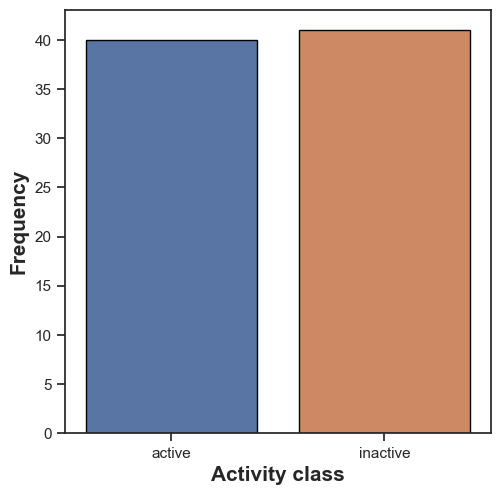

In [191]:
plt.figure(figsize = (5.5,5.5))

sns.countplot(x ='Activity class', data=df_new, edgecolor = 'black')

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold')

plt.savefig('Activity class distribution.pdf', bbox_inches='tight')


### Scatter plot of MW vs LogP

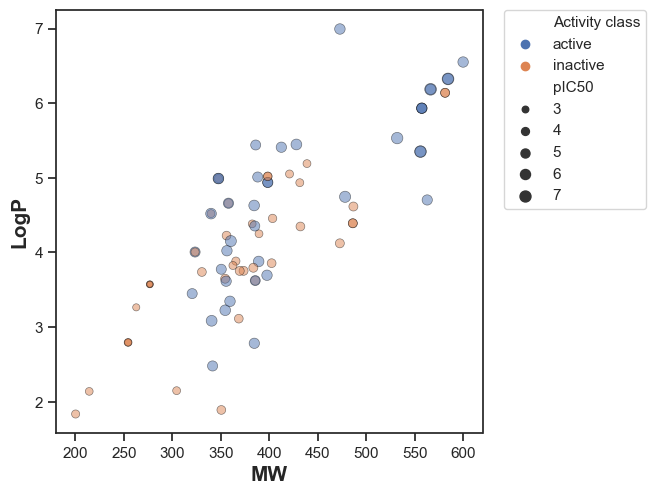

In [193]:
plt.figure(figsize = (5.5,5.5))

sns.scatterplot(x = 'MW', y = 'LogP', hue = 'Activity class', data = df_new, size = 'pIC50', edgecolor = 'black', alpha = 0.5 )

plt.xlabel('MW', fontsize = 15, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 15, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('MW distribution.pdf', bbox_inches='tight')

#### Statistical Analysis - Mann-Whitney U-test

In [206]:
def mannwhitney(descriptor, verbose = False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    seed(1)

#active and inactive
    selection = [descriptor, 'Activity class']
    df = df_new[selection]
    active = df[df['Activity class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'Activity class']
    df = df_new[selection]
    inactive = df[df['Activity class'] == 'inactive']
    inactive = inactive[descriptor]

#comparing samples
    stat, p = mannwhitneyu(active, inactive)

    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution'
    else:
        interpretation = 'Different distribution'
#Dataframe
    results = pd.DataFrame({'Descriptor': descriptor, 'Statistics': stat, 'p': p, 'alpha': alpha, 'Interpretation': interpretation}, index =[0])

    filename = 'mannwhitney_' + descriptor + '.csv'
    results.to_csv(filename)

    return results


In [207]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1640.0,9.110262e-15,0.05,Different distribution


/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


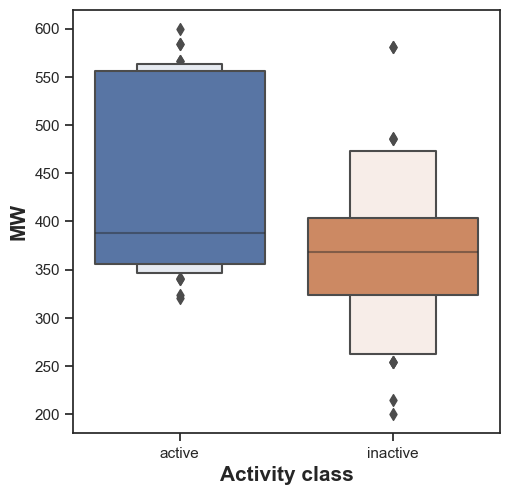

In [210]:
plt.figure(figsize = (5.5,5.5))

sns.boxenplot(x = 'Activity class', y = 'MW',  data = df_new)

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('MW', fontsize = 15, fontweight = 'bold')

plt.savefig('boxplot_MW.pdf', bbox_inches='tight')

In [211]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1074.5,0.016408,0.05,Different distribution


/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


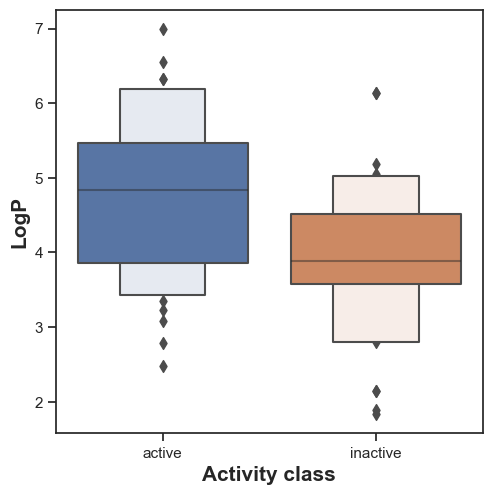

In [213]:
plt.figure(figsize = (5.5,5.5))

sns.boxenplot(x = 'Activity class', y = 'LogP',  data = df_new)

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 15, fontweight = 'bold')

plt.savefig('boxplot_LogP.pdf', bbox_inches='tight')

In [214]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1138.5,0.002662,0.05,Different distribution


/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


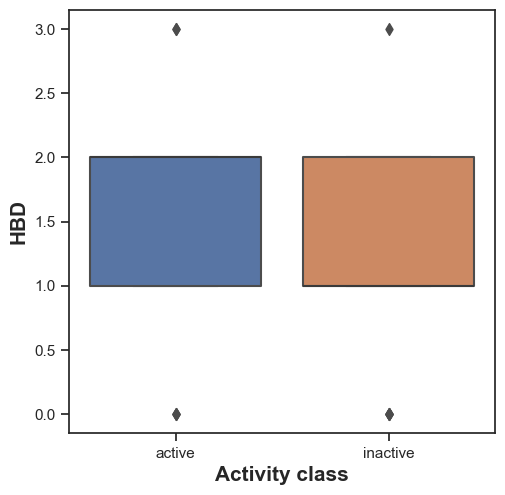

In [215]:
plt.figure(figsize = (5.5,5.5))

sns.boxenplot(x = 'Activity class', y = 'HBD',  data = df_new)

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('HBD', fontsize = 15, fontweight = 'bold')

plt.savefig('boxplot_HBD.pdf', bbox_inches='tight')

In [217]:
mannwhitney('HBD')

,Descriptor,Statistics,p,alpha,Interpretation
0,HBD,919.0,0.307386,0.05,Same distribution


/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


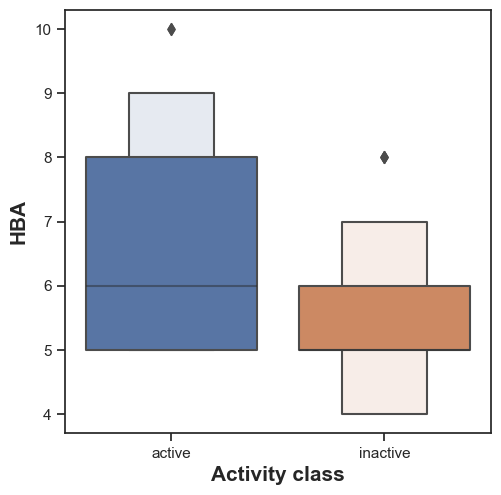

In [218]:
plt.figure(figsize = (5.5,5.5))

sns.boxenplot(x = 'Activity class', y = 'HBA',  data = df_new)

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('HBA', fontsize = 15, fontweight = 'bold')

plt.savefig('boxplot_HBA.pdf', bbox_inches='tight')

In [219]:
mannwhitney('HBA')


,Descriptor,Statistics,p,alpha,Interpretation
0,HBA,1067.0,0.015265,0.05,Different distribution


/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhairyavyas/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


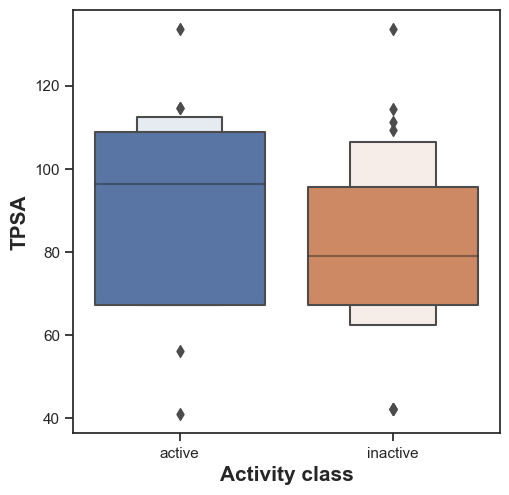

In [220]:
plt.figure(figsize = (5.5,5.5))

sns.boxenplot(x = 'Activity class', y = 'TPSA',  data = df_new)

plt.xlabel('Activity class', fontsize = 15, fontweight = 'bold')
plt.ylabel('TPSA', fontsize = 15, fontweight = 'bold')

plt.savefig('boxplot_TPSA.pdf', bbox_inches='tight')

In [221]:
mannwhitney('TPSA')

,Descriptor,Statistics,p,alpha,Interpretation
0,TPSA,1061.5,0.021584,0.05,Different distribution


### Interpretation of Results

#### Lipinski descriptors

Of the 5 Lipenski descriptors (MW, LogP, HBD, HBA, TPSA) only Hydrogen bond donor (HBD) showed no difference between the active and inactives (same distribution) while all the other descriptors showed statistically significant difference between the active and inactive in the Activity class column